In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense


In [12]:
# Step 1: Load the IMDB dataset
max_features = 10000  # Number of words to consider as features
max_len = 200         # Cut off texts after this number of words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [13]:
# Step 2: Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [14]:
# Step 3: Build the RNN Model
model = Sequential([
    Embedding(max_features, 16, input_length=max_len),  # Reduced embedding size
    SimpleRNN(16),  # Reduced RNN size
    Dense(1, activation='sigmoid')
])

In [15]:
# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [16]:
# Step 5: Train the model for fewer epochs
history = model.fit(x_train, y_train,
                    epochs=3,  # Fewer epochs
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.5369 - loss: 0.6876 - val_accuracy: 0.6410 - val_loss: 0.6357
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.7471 - loss: 0.5344 - val_accuracy: 0.6956 - val_loss: 0.5733
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8507 - loss: 0.3705 - val_accuracy: 0.8160 - val_loss: 0.4276


In [17]:
# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.2f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8132 - loss: 0.4325
Test Loss: 0.4274
Test Accuracy: 0.82


In [18]:
# Step 7: Predictions
sample_review = x_test[0].reshape(1, max_len)  # Test on the first review
prediction = model.predict(sample_review)
print(f"Prediction (1 = Positive, 0 = Negative): {prediction[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Prediction (1 = Positive, 0 = Negative): 0.12681199610233307


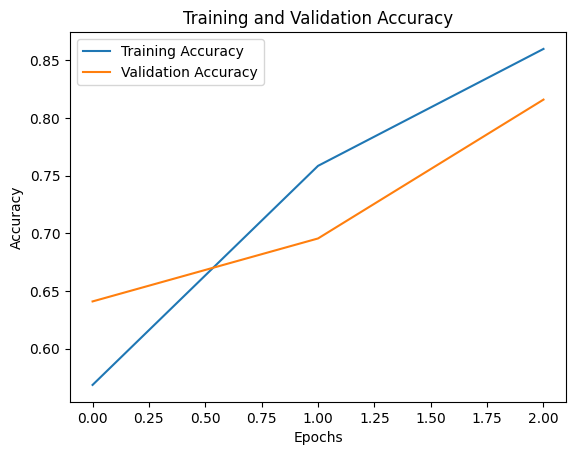

In [19]:
# Step 8: Plot the training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()